In [0]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Now we try to build a simple neural network to classify MNIST dataset with BN, regularization and dropout tips.

In [3]:
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [0]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)


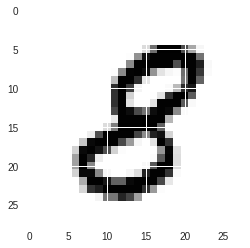

In [7]:
plt.imshow(sample_img).set_cmap('Greys')

In [8]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [1]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

NameError: name 'mnist' is not defined

Define a neural network

In [11]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

Define the training step

In [13]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent' type=NoOp>

In [14]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [15]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.918


Ex1: Add Batch Normalization

Ex2: Add L2 Regularizzation

Ex3: Add Dropout